In [1]:
pair_pth="/mnt/datasets/multimodal/wudao/wudao_test/pairs3k.txt"
texts=[]
imgpths=[]
#获取图像路径 文字描述列表： 
with open(pair_pth,"r") as f:
    for line in f.readlines():
        line=line.strip()
        imgpth,txt = line.split('\t')
        texts.append(txt)
        imgpths.append(imgpth)

In [2]:
#获取保留与丢弃id, 图文对相似度
import pandas as pd
df=pd.read_csv("/mnt/wchh/test_datasets/features_save/sims.csv")
retain_ids=list(df[df["retain"]==True].index)
discard_ids=list(df[df["retain"]==False].index)
sims=list(df["sim"])
print(len(retain_ids),len(discard_ids),len(sims),len(texts))

2352 763 3115 3115


In [3]:
import random
from PIL import Image
from torchvision.transforms import Resize
transform=Resize((224,224), interpolation=Image.BICUBIC)
import pandas as pd
def show(id_list,n):#从id_list从抽取n个显示图文对 及相似度
    sample_ids=random.sample(range(len(id_list)),n)
    sample_ids=[id_list[i] for i in sample_ids]
    print(sample_ids)
    for id in sample_ids:
        print(texts[id])
        print("similarity:",sims[id])
        img=Image.open(imgpths[id])
        img=transform(img)
        img.show()
        print("-"*30)

/tmp/ipykernel_16115/382361571.py:4: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  transform=Resize((224,224), interpolation=Image.BICUBIC)
/opt/conda/envs/torch/lib/python3.9/site-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


====================丢弃：====================
[672, 3109]
工厂,风景,油
similarity: 0.2336824536323547


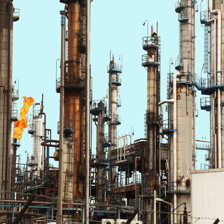

------------------------------
景观,海,光,云,黑与白,创作的
similarity: 0.2280759215354919


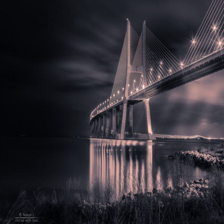

------------------------------
====================保留：====================
[1296, 2341]
车辆,花,爱,金属,鼓,装饰
similarity: 0.2861862778663635


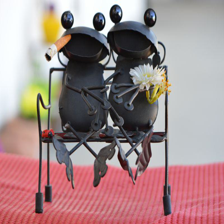

------------------------------
十六湖国家公园,植被,开端,重建,长,克罗地亚
similarity: 0.2810394167900085


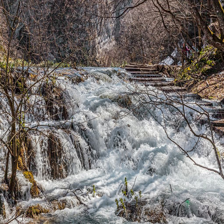

------------------------------


In [4]:
show_n=2
print("="*20+"丢弃："+"="*20)
show(discard_ids,show_n)
print("="*20+"保留："+"="*20)
show(retain_ids,show_n)